In [1]:
import gym 
import numpy as np 
import matplotlib.pyplot as plt
import random


In [2]:
env = gym.make("Taxi-v3")

In [3]:
# Q table

q_table = np.zeros([env.observation_space.n, env.action_space.n ]) # state, action

In [4]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [5]:
# hyperparameter

alpha = 0.1
gamma = 0.9
epsilon = 0.1


In [6]:
# plotting matrix

reward_list = []
dropouts_list = []


In [8]:
episode_number = 1000
for i in range(1, episode_number):
    
    state = env.reset()
    reward_count = 0
    dropouts = 0
    
    while True:
        
        #exploit explore process 
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        
        #action process and result observtion
        next_state, reward, done, _ = env.step(action)
        
        # Q learning func
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        next_value = (1-alpha) * old_value + alpha * (reward + gamma * next_max)
        
        #update q table
        q_table[state, action] = next_value
        
        #update state
        state = next_state
        
        if reward == -10: #characteristic number
            dropouts += 1
            
        if done: 
            break
            
        reward_count += reward

    
    if i % 10 == 0:
        dropouts_list.append(dropouts)
        reward_list.append(reward_count)
        print("episode: {}, reward: {}, wrong dropout: {}".format(i, reward_count, dropouts))
            

episode: 10, reward: -208, wrong dropout: 1
episode: 20, reward: -114, wrong dropout: 5
episode: 30, reward: -131, wrong dropout: 4
episode: 40, reward: -102, wrong dropout: 4
episode: 50, reward: -42, wrong dropout: 2
episode: 60, reward: -334, wrong dropout: 15
episode: 70, reward: -182, wrong dropout: 6
episode: 80, reward: -262, wrong dropout: 7
episode: 90, reward: -172, wrong dropout: 3
episode: 100, reward: -280, wrong dropout: 9
episode: 110, reward: -325, wrong dropout: 14
episode: 120, reward: -253, wrong dropout: 6
episode: 130, reward: -291, wrong dropout: 14
episode: 140, reward: -114, wrong dropout: 4
episode: 150, reward: -262, wrong dropout: 7
episode: 160, reward: -37, wrong dropout: 0
episode: 170, reward: -130, wrong dropout: 4
episode: 180, reward: -194, wrong dropout: 7
episode: 190, reward: -159, wrong dropout: 3
episode: 200, reward: -214, wrong dropout: 9
episode: 210, reward: -161, wrong dropout: 2
episode: 220, reward: -211, wrong dropout: 6
episode: 230, rewa

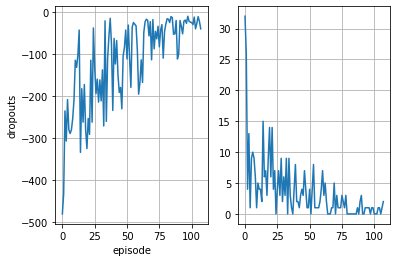

In [9]:
#visualize 

fig, axs = plt.subplots(1,2)
axs[0].plot(reward_list)
axs[0].set_xlabel("episode")
axs[0].set_ylabel("reward")

axs[1].plot(dropouts_list)
axs[0].set_xlabel("episode")
axs[0].set_ylabel("dropouts")

axs[0].grid(True)
axs[1].grid(True)

plt.show()